In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sbr

In [2]:
#from Project.data import HotelsData

In [3]:
#pip install openpyxl

In [4]:
guests_df = pd.read_excel('Project/Datasets/guests.xlsx')
hotels_df = pd.read_excel('Project/Datasets/hotels.xlsx')
pref_df = pd.read_excel('Project/Datasets/preferences.xlsx')

In [5]:
guests_df.dtypes

Unnamed: 0      int64
guest          object
discount      float64
dtype: object

In [6]:
hotels_df.dtypes

Unnamed: 0     int64
hotel         object
rooms          int64
price          int64
dtype: object

In [7]:
pref_df.dtypes

Unnamed: 0     int64
guest         object
hotel         object
priority       int64
dtype: object

In [8]:
guests_df['guest_num'] = guests_df['guest'].str.split('_').str[1].astype(int)
guests_df

,Unnamed: 0,guest,discount,guest_num
0,0,guest_1,0.09,1
1,1,guest_2,0.00,2
2,2,guest_3,0.07,3
3,3,guest_4,0.00,4
4,4,guest_5,0.10,5
...,...,...,...,...
3995,3995,guest_3996,0.00,3996
3996,3996,guest_3997,0.15,3997
3997,3997,guest_3998,0.07,3998
3998,3998,guest_3999,0.08,3999


In [9]:
duplicated_guests = guests_df['guest'].duplicated()
check_duplicated_guests = {'Total rows': duplicated_guests.count(), 'Duplicated': duplicated_guests[duplicated_guests].count(), 'Not duplicated': duplicated_guests[~duplicated_guests].count()}
check_duplicated_guests

{'Total rows': 4000, 'Duplicated': 0, 'Not duplicated': 4000}

In [10]:
hotels_df['hotel_num'] = hotels_df['hotel'].str.split('_').str[1].astype(int)
hotels_df

,Unnamed: 0,hotel,rooms,price,hotel_num
0,0,hotel_1,13,273,1
1,1,hotel_2,18,92,2
2,2,hotel_3,12,141,3
3,3,hotel_4,18,157,4
4,4,hotel_5,7,298,5
...,...,...,...,...,...
395,395,hotel_396,5,212,396
396,396,hotel_397,12,68,397
397,397,hotel_398,14,102,398
398,398,hotel_399,16,284,399


In [11]:
duplicated_hotels = hotels_df['hotel'].duplicated()
check_duplicated_hotels = {'Total rows': duplicated_hotels.count(), 'Duplicated': duplicated_hotels[duplicated_hotels].count(), 'Not duplicated': duplicated_hotels[~duplicated_hotels].count()}
check_duplicated_hotels

{'Total rows': 400, 'Duplicated': 0, 'Not duplicated': 400}

In [12]:
Availability = hotels_df["rooms"].sum()
Availability

4617

In [13]:
pref_df['guest_num'] = pref_df['guest'].str.split('_').str[1].astype(int)
pref_df['hotel_num'] = pref_df['hotel'].str.split('_').str[1].astype(int)
pref_df['concat'] = pref_df['guest']+pref_df['hotel']
pref_df

,Unnamed: 0,guest,hotel,priority,guest_num,hotel_num,concat
0,0,guest_1,hotel_168,1,1,168,guest_1hotel_168
1,1,guest_1,hotel_207,2,1,207,guest_1hotel_207
2,2,guest_1,hotel_222,3,1,222,guest_1hotel_222
3,3,guest_1,hotel_124,4,1,124,guest_1hotel_124
4,4,guest_1,hotel_223,5,1,223,guest_1hotel_223
...,...,...,...,...,...,...,...
99528,99528,guest_4000,hotel_123,28,4000,123,guest_4000hotel_123
99529,99529,guest_4000,hotel_396,29,4000,396,guest_4000hotel_396
99530,99530,guest_4000,hotel_161,30,4000,161,guest_4000hotel_161
99531,99531,guest_4000,hotel_330,31,4000,330,guest_4000hotel_330


In [14]:
duplicated_priors = pref_df['concat'].duplicated()
check_duplicated_priors = {'Total rows': duplicated_priors.count(), 'Duplicated': duplicated_priors[duplicated_priors].count(), 'Not duplicated': duplicated_priors[~duplicated_priors].count()}
check_duplicated_priors

{'Total rows': 99533, 'Duplicated': 3755, 'Not duplicated': 95778}

In [15]:
prior_df = pref_df.drop_duplicates(subset=['concat'], keep='first')
prior_df.reset_index(drop=True, inplace=True)
prior_df

,Unnamed: 0,guest,hotel,priority,guest_num,hotel_num,concat
0,0,guest_1,hotel_168,1,1,168,guest_1hotel_168
1,1,guest_1,hotel_207,2,1,207,guest_1hotel_207
2,2,guest_1,hotel_222,3,1,222,guest_1hotel_222
3,3,guest_1,hotel_124,4,1,124,guest_1hotel_124
4,4,guest_1,hotel_223,5,1,223,guest_1hotel_223
...,...,...,...,...,...,...,...
95773,99528,guest_4000,hotel_123,28,4000,123,guest_4000hotel_123
95774,99529,guest_4000,hotel_396,29,4000,396,guest_4000hotel_396
95775,99530,guest_4000,hotel_161,30,4000,161,guest_4000hotel_161
95776,99531,guest_4000,hotel_330,31,4000,330,guest_4000hotel_330


In [16]:
duplicated_priors_2 = prior_df['concat'].duplicated()
check_duplicated_priors_2 = {'Total rows': duplicated_priors_2.count(), 'Duplicated': duplicated_priors_2[duplicated_priors_2].count(), 'Not duplicated': duplicated_priors_2[~duplicated_priors_2].count()}
check_duplicated_priors_2

{'Total rows': 95778, 'Duplicated': 0, 'Not duplicated': 95778}

In [17]:
def Random_allocation(guests_df, hotels_df, prior_df):
    
    allocation = {'guest': [], 'hotel': [], 'net_earning': [], 'guest_satisfaction': []}
    
    random_guest = np.random.choice(guests_df['guest'],size = len(guests_df)).tolist()

    hotel_list = pd.Series(hotels_df['rooms'].values, index = hotels_df['hotel'])
    random_hotel = hotel_list.sample(frac=1).to_dict()
        
    for guest in random_guest:
            
        guest_discount = guests_df[guests_df['guest'] == guest]['discount'].values[0]

        priority_hotels = prior_df[prior_df['guest'] == guest].sort_values(by='priority')['hotel'].tolist()
        
        for hotel in random_hotel:
            if hotel in priority_hotels and random_hotel[hotel]>0:
                random_hotel[hotel] -=1
    
                gross_earning = hotels_df[hotels_df['hotel'] == hotel]['price'].values[0]
                net_earning = gross_earning*(1-guest_discount)
        
                satisfaction = 1 if priority_hotels.index(hotel)+1 == 1 else(
                    2 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.25) else(
                    3 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.5) else(
                    4 if priority_hotels.index(hotel)+1 < (len(priority_hotels) * 0.75) else 5)))
        
                allocation['guest'].append(guest)
                allocation['hotel'].append(hotel)
                allocation['net_earning'].append(net_earning)
                allocation['guest_satisfaction'].append(satisfaction)
                break

    random_allocation = pd.DataFrame(allocation)
    return random_allocation

In [18]:
Random_strategy = Random_allocation(guests_df, hotels_df, prior_df)
Random_strategy

,guest,hotel,net_earning,guest_satisfaction
0,guest_2694,hotel_204,77.19,5
1,guest_655,hotel_56,195.94,5
2,guest_1728,hotel_364,172.48,3
3,guest_2101,hotel_191,250.00,1
4,guest_2482,hotel_157,57.85,5
...,...,...,...,...
3905,guest_754,hotel_79,68.25,2
3906,guest_5,hotel_187,193.50,3
3907,guest_1037,hotel_181,93.96,2
3908,guest_3493,hotel_331,214.76,5


In [19]:
excel = Random_strategy.to_csv('random_strategy.csv')
excel

In [20]:
print(f"\033[1mGuests' results:\033[0m")
print(f"Guests accomodated: {Random_strategy['guest'].count()} ({round((Random_strategy['guest'].count()/guests_df['guest'].count())*100,2)}% of the total guests)")
print(f"Average guests' satisfaction: {round((Random_strategy['guest_satisfaction'].mean()),0)} (being 1 completely satisfied, and 4 not satisfied)")

print(f"\033[1mHotels' results:\033[0m")
print(f"Rooms occupied: {len(Random_strategy)} ({round((len(Random_strategy)/hotels_df['rooms'].sum())*100,2)}% of the total available rooms)")
print(f"Hotels occupied: {Random_strategy['hotel'].nunique()} ({round((Random_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}% of the total available hotels)")

hotel_list = pd.Series(hotels_df.rooms.values, index = hotels_df.hotel)
rooms_occupied = Random_strategy.groupby('hotel')['guest'].count()
fully_occupied = hotel_list.subtract(rooms_occupied)
print(f"Hotels fully occupied: {len(fully_occupied[fully_occupied == 0])} ({round((len(fully_occupied[fully_occupied == 0])/Random_strategy['hotel'].nunique())*100,2)}% of the hotels occupied)")
print(f"Total net earnings: €{round(Random_strategy['net_earning'].sum(),2):,}")
print(f"Average net earnings per hotel: €{round((Random_strategy['net_earning'].sum())/Random_strategy['hotel'].nunique(),2):,}")

Guests' results:
Guests accomodated: 3908 (97.7% of the total guests)
Average guests' satisfaction: 3.0 (being 1 completely satisfied, and 4 not satisfied)
Hotels' results:
Rooms occupied: 3908 (84.64% of the total available rooms)
Hotels occupied: 387 (96.75% of the total available hotels)
Hotels fully occupied: 319 (82.43% of the hotels occupied)
Total net earnings: €617,476.02
Average net earnings per hotel: €1,595.55


In [21]:
def Hotel_list():
    hotel_list = []
    for hotel, rooms in zip(hotels_df['hotel'], hotels_df['rooms']):
        hotel_list.extend([hotel] * rooms)
    return hotel_list

In [22]:
def Random_guest():
    Random_guests = list(np.random.choice(guests_df["guest"],size = len(guests_df), replace = False))
    return Random_guests

In [23]:
#Random_guest()

In [24]:
def Random_hotel():
    hotel_list = Hotel_list()
    np.random.shuffle(hotel_list)
    return hotel_list

In [25]:
#Random_hotel()

In [26]:
def Random_allocation():
    guest = Random_guest()
    hotel = Random_hotel()
    length = min(len(guest),len(hotel))
    allocation = [(guest, hotel) for guest, hotel in zip(guest[:length],hotel[:length])]
    return allocation

In [27]:
#Random_allocation()

In [28]:
def Priority_allocation(guests_df, hotels_df, prior_df):
        
    allocation = {'guest': [], 'hotel': [], 'net_earning': [], 'guest_satisfaction': []}

    guest_list = guests_df['guest'].tolist()

    hotel_list = pd.Series(hotels_df['rooms'].values, index = hotels_df.hotel).to_dict()
        
    for guest in guest_list:
            
            guest_discount = guests_df[guests_df['guest'] == guest]['discount'].values[0]
    
            priority_hotels = prior_df[prior_df['guest'] == guest].sort_values(by='priority')['hotel'].tolist()
            
            for hotel in priority_hotels:
                if hotel_list[hotel]>0:
                    hotel_list[hotel] -=1
        
                    gross_earning = hotels_df[hotels_df['hotel'] == hotel]['price'].values[0]
                    net_earning = gross_earning*(1-guest_discount)
            
                    satisfaction = 1 if priority_hotels.index(hotel)+1 == 1 else(
                    2 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.25) else(
                    3 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.5) else(
                    4 if priority_hotels.index(hotel)+1 < (len(priority_hotels) * 0.75) else 5)))
            
                    allocation['guest'].append(guest)
                    allocation['hotel'].append(hotel)
                    allocation['net_earning'].append(net_earning)
                    allocation['guest_satisfaction'].append(satisfaction)
                    break

    priority_allocation = pd.DataFrame(allocation)
    return priority_allocation

In [29]:
Priority_strategy = Priority_allocation(guests_df, hotels_df, prior_df)
Priority_strategy

,guest,hotel,net_earning,guest_satisfaction
0,guest_1,hotel_168,271.18,1
1,guest_2,hotel_369,133.00,1
2,guest_3,hotel_157,60.45,1
3,guest_4,hotel_235,136.00,1
4,guest_5,hotel_121,50.40,1
...,...,...,...,...
3970,guest_3996,hotel_350,56.00,1
3971,guest_3997,hotel_19,96.05,1
3972,guest_3998,hotel_117,262.26,2
3973,guest_3999,hotel_277,258.52,1


In [30]:
excel = Priority_strategy.to_csv('priority_strategy.csv')
excel

In [31]:
print(f"\033[1mGuests' results:\033[0m")
print(f"Guests accomodated: {Priority_strategy['guest'].count()} ({round((Priority_strategy['guest'].count()/guests_df['guest'].count())*100,2)}% of the total guests)")
print(f"Average guests' satisfaction: {round((Priority_strategy['guest_satisfaction'].mean()),0)} (being 1 completely satisfied, and 4 not satisfied)")

print(f"\033[1mHotels' results:\033[0m")
print(f"Rooms occupied: {len(Priority_strategy)} ({round((len(Priority_strategy)/hotels_df['rooms'].sum())*100,2)}% of the total available rooms)")
print(f"Hotels occupied: {Priority_strategy['hotel'].nunique()} ({round((Priority_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}% of the total available hotels)")

hotel_list = pd.Series(hotels_df.rooms.values, index = hotels_df.hotel)
rooms_occupied = Priority_strategy.groupby('hotel')['guest'].count()
fully_occupied = hotel_list.subtract(rooms_occupied)
print(f"Hotels fully occupied: {len(fully_occupied[fully_occupied == 0])} ({round((len(fully_occupied[fully_occupied == 0])/Priority_strategy['hotel'].nunique())*100,2)}% of the hotels occupied)")
print(f"Total net earnings: €{round(Priority_strategy['net_earning'].sum(),2):,}")
print(f"Average net earnings per hotel: €{round((Priority_strategy['net_earning'].sum())/Priority_strategy['hotel'].nunique(),2):,}")

Guests' results:
Guests accomodated: 3975 (99.38% of the total guests)
Average guests' satisfaction: 1.0 (being 1 completely satisfied, and 4 not satisfied)
Hotels' results:
Rooms occupied: 3975 (86.09% of the total available rooms)
Hotels occupied: 400 (100.0% of the total available hotels)
Hotels fully occupied: 255 (63.75% of the hotels occupied)
Total net earnings: €643,597.53
Average net earnings per hotel: €1,608.99


In [32]:
def Priority_list():
    pref_sort = prior_df.sort_values(by=['guest_num','priority'])
    priority = list(pref_sort[['guest','hotel']].itertuples(index=False, name=None))
    return priority

In [33]:
#Priority_list()

In [34]:
def Priority_allocation():
    used_guest=set()
    prior=[]
    priority_list=Priority_list()
    hotel_list=Hotel_list()
    for guest, hotel in priority_list:
        if guest not in used_guest:
            if hotel in hotel_list:
                prior.append((guest,hotel))
                hotel_list.remove(hotel)
                used_guest.add(guest)
    return pd.DataFrame(prior, columns=['guest', 'hotel'])

In [35]:
#Priority_allocation()

In [36]:
def Price_allocation(guests_df, hotels_df, prior_df):
    
    allocation = {'guest': [], 'hotel': [], 'net_earning': [], 'guest_satisfaction': []}
    
    guest_list = guests_df['guest'].tolist()

    hotel_ordered = hotels_df.sort_values(by='price') 
    hotel_list = pd.Series(hotel_ordered['rooms'].values, index = hotel_ordered.hotel).to_dict()
        
    for guest in guest_list:
            
        guest_discount = guests_df[guests_df['guest'] == guest]['discount'].values[0]

        priority_hotels = prior_df[prior_df['guest'] == guest].sort_values(by='priority')['hotel'].tolist()
        
        for hotel in hotel_list:
            if hotel in priority_hotels and hotel_list[hotel]>0:
                hotel_list[hotel] -=1
    
                gross_earning = hotels_df[hotels_df['hotel'] == hotel]['price'].values[0]
                net_earning = gross_earning*(1-guest_discount)
        
                satisfaction = 1 if priority_hotels.index(hotel)+1 == 1 else(
                    2 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.25) else(
                    3 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.5) else(
                    4 if priority_hotels.index(hotel)+1 < (len(priority_hotels) * 0.75) else 5)))
        
                allocation['guest'].append(guest)
                allocation['hotel'].append(hotel)
                allocation['net_earning'].append(net_earning)
                allocation['guest_satisfaction'].append(satisfaction)
                break

    price_allocation = pd.DataFrame(allocation)
    return price_allocation

In [37]:
Price_strategy = Price_allocation(guests_df, hotels_df, prior_df)
Price_strategy

,guest,hotel,net_earning,guest_satisfaction
0,guest_1,hotel_22,55.51,5
1,guest_2,hotel_26,55.00,4
2,guest_3,hotel_6,53.94,2
3,guest_4,hotel_321,54.00,5
4,guest_5,hotel_121,50.40,1
...,...,...,...,...
3920,guest_3996,hotel_115,244.00,4
3921,guest_3997,hotel_147,213.35,3
3922,guest_3998,hotel_352,256.68,2
3923,guest_3999,hotel_277,258.52,1


In [38]:
excel = Price_strategy.to_csv('price_strategy.csv')
excel

In [39]:
print(f"\033[1mGuests' results:\033[0m")
print(f"Guests accomodated: {Price_strategy['guest'].count()} ({round((Price_strategy['guest'].count()/guests_df['guest'].count())*100,2)}% of the total guests)")
print(f"Average guests' satisfaction: {round((Price_strategy['guest_satisfaction'].mean()),0)} (being 1 completely satisfied, and 4 not satisfied)")

print(f"\033[1mHotels' results:\033[0m")
print(f"Rooms occupied: {len(Price_strategy)} ({round((len(Price_strategy)/hotels_df['rooms'].sum())*100,2)}% of the total available rooms)")
print(f"Hotels occupied: {Price_strategy['hotel'].nunique()} ({round((Price_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}% of the total available hotels)")

hotel_list = pd.Series(hotels_df.rooms.values, index = hotels_df.hotel)
rooms_occupied = Price_strategy.groupby('hotel')['guest'].count()
fully_occupied = hotel_list.subtract(rooms_occupied)
print(f"Hotels fully occupied: {len(fully_occupied[fully_occupied == 0])} ({round((len(fully_occupied[fully_occupied == 0])/Price_strategy['hotel'].nunique())*100,2)}% of the hotels occupied)")
print(f"Total net earnings: €{round(Price_strategy['net_earning'].sum(),2):,}")
print(f"Average net earnings per hotel: €{round((Price_strategy['net_earning'].sum())/Price_strategy['hotel'].nunique(),2):,}")

Guests' results:
Guests accomodated: 3925 (98.12% of the total guests)
Average guests' satisfaction: 3.0 (being 1 completely satisfied, and 4 not satisfied)
Hotels' results:
Rooms occupied: 3925 (85.01% of the total available rooms)
Hotels occupied: 388 (97.0% of the total available hotels)
Hotels fully occupied: 319 (82.22% of the hotels occupied)
Total net earnings: €564,085.08
Average net earnings per hotel: €1,453.83


In [40]:
def Hotel_by_price():
    price_sort = hotels_df.sort_values(by=['price', 'hotel_num'])
    hotel_list = []
    for hotel, rooms in zip(price_sort['hotel'], price_sort['rooms']):
        hotel_list.extend([hotel] * rooms)
    return hotel_list

In [41]:
#Hotel_by_price()

In [42]:
def Order_by_price():
    merge=prior_df.merge(hotels_df[['hotel','price']], on='hotel', how='left').sort_values(by=['guest_num', 'price'])
    priority_list=list(merge[['guest', 'hotel']].itertuples(index=False, name=None))
    return priority_list

In [43]:
#Order_by_price()

In [44]:
def Price_allocation():
    used_guest=set()
    price=[]
    guest_list=Order_by_price()
    hotel_list=Hotel_by_price()
    
    for guest, hotel in guest_list:        
        if guest not in used_guest:
            if hotel in hotel_list:
                price.append((guest,hotel))
                hotel_list.remove(hotel)
                used_guest.add(guest)
    return pd.DataFrame(price, columns = ['guest', 'hotel'])

In [45]:
#Price_allocation()

In [46]:
#len(Price_allocation)

In [47]:
def Room_allocation(guests_df, hotels_df, prior_df):
    
    allocation = {'guest': [], 'hotel': [], 'net_earning': [], 'guest_satisfaction': []}
    
    guest_list = guests_df['guest'].tolist()

    hotel_ordered = hotels_df.sort_values(by='rooms') 
    hotel_list = pd.Series(hotel_ordered['rooms'].values, index = hotel_ordered.hotel).to_dict()
        
    for guest in guest_list:
            
        guest_discount = guests_df[guests_df['guest'] == guest]['discount'].values[0]

        priority_hotels = prior_df[prior_df['guest'] == guest].sort_values(by='priority')['hotel'].tolist()
        
        for hotel in hotel_list:
            if hotel in priority_hotels and hotel_list[hotel]>0:
                hotel_list[hotel] -=1
    
                gross_earning = hotels_df[hotels_df['hotel'] == hotel]['price'].values[0]
                net_earning = gross_earning*(1-guest_discount)
        
                satisfaction = 1 if priority_hotels.index(hotel)+1 == 1 else(
                    2 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.25) else(
                    3 if priority_hotels.index(hotel)+1 <= (len(priority_hotels) * 0.5) else(
                    4 if priority_hotels.index(hotel)+1 < (len(priority_hotels) * 0.75) else 5)))
        
                allocation['guest'].append(guest)
                allocation['hotel'].append(hotel)
                allocation['net_earning'].append(net_earning)
                allocation['guest_satisfaction'].append(satisfaction)
                break

    room_allocation = pd.DataFrame(allocation)
    return room_allocation

In [48]:
Room_strategy = Room_allocation(guests_df, hotels_df, prior_df)
Room_strategy

,guest,hotel,net_earning,guest_satisfaction
0,guest_1,hotel_269,115.57,5
1,guest_2,hotel_79,75.00,4
2,guest_3,hotel_179,159.03,3
3,guest_4,hotel_212,205.00,5
4,guest_5,hotel_85,263.70,5
...,...,...,...,...
3869,guest_3996,hotel_110,140.00,5
3870,guest_3997,hotel_316,158.95,5
3871,guest_3998,hotel_110,130.20,5
3872,guest_3999,hotel_110,128.80,3


In [49]:
excel = Room_strategy.to_csv('room_strategy.csv')
excel

In [50]:
print(f"\033[1mGuests' results:\033[0m")
print(f"Guests accomodated: {Room_strategy['guest'].count()} ({round((Room_strategy['guest'].count()/guests_df['guest'].count())*100,2)}% of the total guests)")
print(f"Average guests' satisfaction: {round((Room_strategy['guest_satisfaction'].mean()),0)} (being 1 completely satisfied, and 4 not satisfied)")

print(f"\033[1mHotels' results:\033[0m")
print(f"Rooms occupied: {len(Room_strategy)} ({round((len(Room_strategy)/hotels_df['rooms'].sum())*100,2)}% of the total available rooms)")
print(f"Hotels occupied: {Room_strategy['hotel'].nunique()} ({round((Room_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}% of the total available hotels)")

hotel_list = pd.Series(hotels_df.rooms.values, index = hotels_df.hotel)
rooms_occupied = Room_strategy.groupby('hotel')['guest'].count()
fully_occupied = hotel_list.subtract(rooms_occupied)
print(f"Hotels fully occupied: {len(fully_occupied[fully_occupied == 0])} ({round((len(fully_occupied[fully_occupied == 0])/Room_strategy['hotel'].nunique())*100,2)}% of the hotels occupied)")
print(f"Total net earnings: €{round(Room_strategy['net_earning'].sum(),2):,}")
print(f"Average net earnings per hotel: €{round((Room_strategy['net_earning'].sum())/Room_strategy['hotel'].nunique(),2):,}")

Guests' results:
Guests accomodated: 3874 (96.85% of the total guests)
Average guests' satisfaction: 3.0 (being 1 completely satisfied, and 4 not satisfied)
Hotels' results:
Rooms occupied: 3874 (83.91% of the total available rooms)
Hotels occupied: 397 (99.25% of the total available hotels)
Hotels fully occupied: 344 (86.65% of the hotels occupied)
Total net earnings: €629,523.35
Average net earnings per hotel: €1,585.7


In [51]:
def Hotel_by_qrooms():
    rooms_sort = hotels_df.sort_values(by=['rooms'], ascending=False)
    hotel_list = []
    for hotel, rooms in zip(rooms_sort['hotel'], rooms_sort['rooms']):
        hotel_list.extend([hotel] * rooms)
    return hotel_list

In [52]:
#Hotel_by_qrooms()

In [53]:
def Order_by_rooms():
    merge=prior_df.merge(hotels_df[['hotel','rooms']], on='hotel', how='left').sort_values(by=['rooms', 'guest_num'], ascending=[False,True])
    priority_list=list(merge[['guest', 'hotel']].itertuples(index=False, name=None))
    return priority_list

In [54]:
#Order_by_rooms()

In [55]:
def qRoom_allocation():
    used_guest=set()
    qrooms=[]
    guest_list=Order_by_rooms()
    hotel_list=Hotel_by_qrooms()
    
    for guest, hotel in guest_list:        
        if guest not in used_guest:
            if hotel in hotel_list:
                qrooms.append((guest,hotel))
                hotel_list.remove(hotel)
                used_guest.add(guest)
    return pd.DataFrame(qrooms, columns = ['guest', 'hotel'])

In [56]:
#qRoom_allocation()

In [57]:
#len(qRoom_allocation())

In [82]:
print(f"\033[1mSatisfaction is measured from 1 (completely satisfied) to 4 (not satisfied)\033[0m")
Results = pd.DataFrame(['Random', 'Priority', 'Price', 'Rooms'])
Results.columns = ["Strategy"] + list(Results.columns[1:])
Results['Guests accomodated'] = [f"{(Random_strategy['guest'].count()):,}", f"{(Priority_strategy['guest'].count()):,}", f"{(Price_strategy['guest'].count()):,}", f"{(Room_strategy['guest'].count()):,}"]
Results['vs_total guests'] = [f"{round((Random_strategy['guest'].count()/guests_df['guest'].count())*100,2)}%", f"{round((Priority_strategy['guest'].count()/guests_df['guest'].count())*100,2)}%", f"{round((Price_strategy['guest'].count()/guests_df['guest'].count())*100,2)}%", f"{round((Room_strategy['guest'].count()/guests_df['guest'].count())*100,2)}%"]
Results['Average satisfaction'] = [round((Random_strategy['guest_satisfaction'].mean()),0), round((Priority_strategy['guest_satisfaction'].mean()),0), round((Price_strategy['guest_satisfaction'].mean()),0), round((Room_strategy['guest_satisfaction'].mean()),0)]
Results['Hotels occupied'] = [Random_strategy['hotel'].nunique(), Priority_strategy['hotel'].nunique(), Price_strategy['hotel'].nunique(), Room_strategy['hotel'].nunique()]
Results['vs total hotels'] = [f"{round((Random_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}%", f"{round((Priority_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}%", f"{round((Price_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}%", f"{round((Room_strategy['hotel'].nunique()/hotels_df['hotel'].count())*100,2)}%"]

hotel_list = pd.Series(hotels_df.rooms.values, index=hotels_df.hotel)
random_remaining_rooms = hotel_list.subtract(Random_strategy.groupby('hotel')['guest'].count())
priority_remaining_rooms = hotel_list.subtract(Priority_strategy.groupby('hotel')['guest'].count())
price_remaining_rooms = hotel_list.subtract(Price_strategy.groupby('hotel')['guest'].count())
room_remaining_rooms = hotel_list.subtract(Room_strategy.groupby('hotel')['guest'].count())

Results['Hotels fully occupied'] = [len(random_remaining_rooms[random_remaining_rooms == 0]), len(priority_remaining_rooms[priority_remaining_rooms == 0]), len(price_remaining_rooms[price_remaining_rooms == 0]), len(room_remaining_rooms[room_remaining_rooms == 0])]
Results['vs hotels occupied'] = [f"{round((len(random_remaining_rooms[random_remaining_rooms == 0])/Random_strategy['hotel'].nunique())*100,2)}%", f"{round((len(priority_remaining_rooms[priority_remaining_rooms == 0])/Priority_strategy['hotel'].nunique())*100,2)}%", f"{round((len(price_remaining_rooms[price_remaining_rooms == 0])/Price_strategy['hotel'].nunique())*100,2)}%", f"{round((len(room_remaining_rooms[room_remaining_rooms == 0])/Room_strategy['hotel'].nunique())*100,2)}%"]
Results['Average earnings per hotel'] = [f"€{round((Random_strategy['net_earning'].sum())/Random_strategy['hotel'].nunique(),2):,}", f"€{round((Priority_strategy['net_earning'].sum())/Priority_strategy['hotel'].nunique(),2):,}", f"€{round((Price_strategy['net_earning'].sum())/Price_strategy['hotel'].nunique(),2):,}", f"€{round((Room_strategy['net_earning'].sum())/Room_strategy['hotel'].nunique(),2):,}"]
Results['Strategy´s total earnings'] = [f"€{round(Random_strategy['net_earning'].sum(),2):,}", f"€{round(Priority_strategy['net_earning'].sum(),2):,}", f"€{round(Price_strategy['net_earning'].sum(),2):,}", f"€{round(Room_strategy['net_earning'].sum(),2):,}"]
Results.set_index('Strategy')

Satisfaction is measured from 1 (completely satisfied) to 4 (not satisfied)


,Guests accomodated,vs_total guests,Average satisfaction,Hotels occupied,vs total hotels,Hotels fully occupied,vs hotels occupied,Average earnings per hotel,Strategy´s total earnings
Strategy,,,,,,,,,
Random,"3,908",97.7%,3.0,387,96.75%,319,82.43%,"€1,595.55","€617,476.02"
Priority,"3,975",99.38%,1.0,400,100.0%,255,63.75%,"€1,608.99","€643,597.53"
Price,"3,925",98.12%,3.0,388,97.0%,319,82.22%,"€1,453.83","€564,085.08"
Rooms,"3,874",96.85%,3.0,397,99.25%,344,86.65%,"€1,585.7","€629,523.35"


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

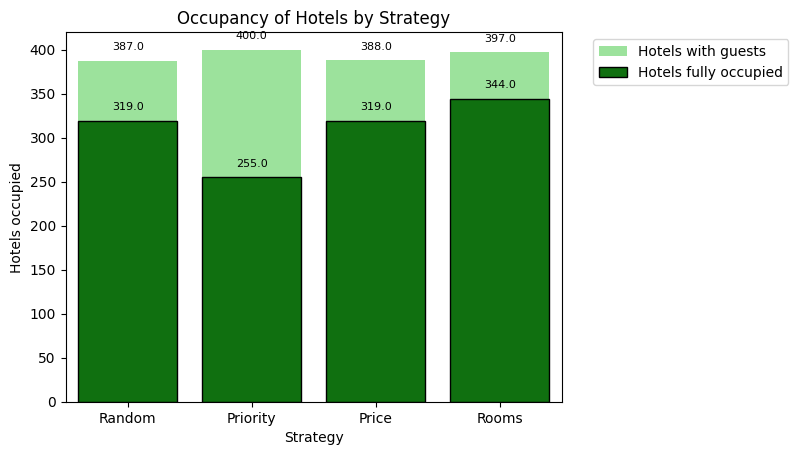

In [105]:
ax = sns.barplot(data=Results, x='Strategy', y='Hotels occupied', color='lightgreen', label='Hotels with guests')
ax = sns.barplot(data=Results, x='Strategy', y='Hotels fully occupied', color='green', edgecolor="black", label='Hotels fully occupied')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Occupancy of Hotels by Strategy')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

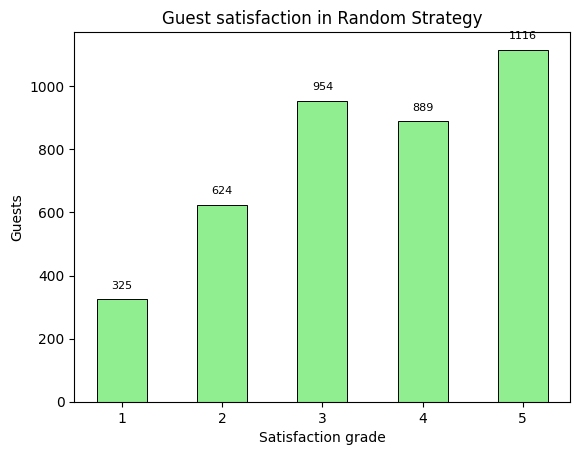

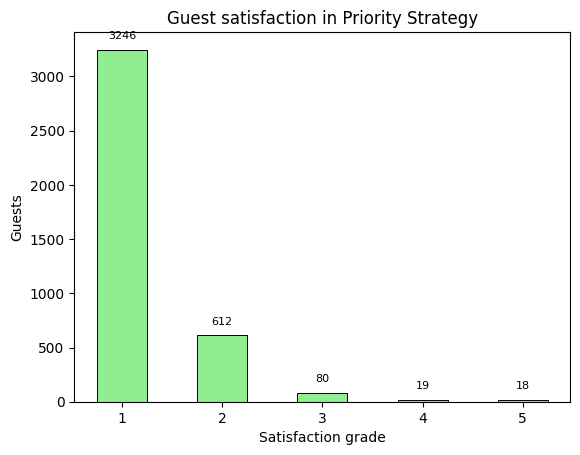

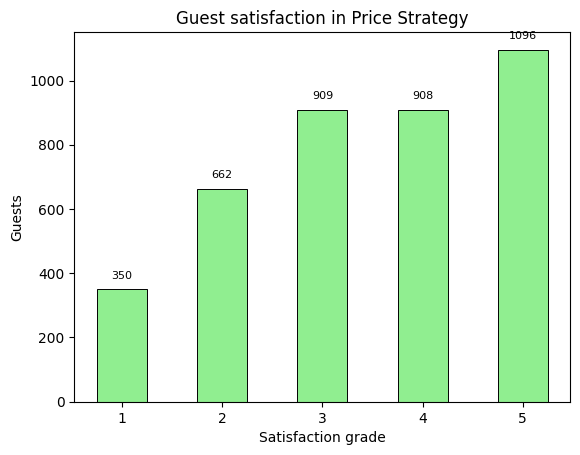

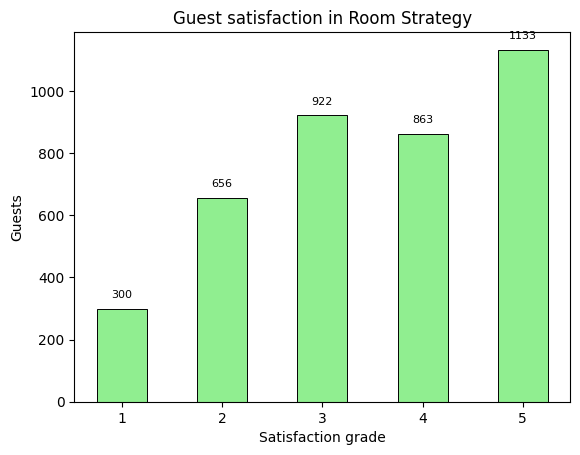

In [103]:
#Random Strategy
sizes = Random_strategy.groupby('guest_satisfaction')['guest'].count()
fig, ax = plt.subplots()
ax.bar(x = sizes.index, height = sizes, width=0.5, color="lightgreen", edgecolor="black", linewidth=0.7)
ax.set_xlabel('Satisfaction grade')
ax.set_ylabel('Guests')
ax.set_title('Guest satisfaction in Random Strategy')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

#Priority Strategy
sizes = Priority_strategy.groupby('guest_satisfaction')['guest'].count()
fig, ax = plt.subplots()
ax.bar(x = sizes.index, height = sizes, width=0.5, color="lightgreen", edgecolor="black", linewidth=0.7)
ax.set_xlabel('Satisfaction grade')
ax.set_ylabel('Guests')
ax.set_title('Guest satisfaction in Priority Strategy')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

#Price Strategy
sizes = Price_strategy.groupby('guest_satisfaction')['guest'].count()
fig, ax = plt.subplots()
ax.bar(x = sizes.index, height = sizes, width=0.5, color="lightgreen", edgecolor="black", linewidth=0.7)
ax.set_xlabel('Satisfaction grade')
ax.set_ylabel('Guests')
ax.set_title('Guest satisfaction in Price Strategy')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

#Room Strategy
sizes = Room_strategy.groupby('guest_satisfaction')['guest'].count()
fig, ax = plt.subplots()
ax.bar(x = sizes.index, height = sizes, width=0.5, color="lightgreen", edgecolor="black", linewidth=0.7)
ax.set_xlabel('Satisfaction grade')
ax.set_ylabel('Guests')
ax.set_title('Guest satisfaction in Room Strategy')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Hotels´ earnings by guest')

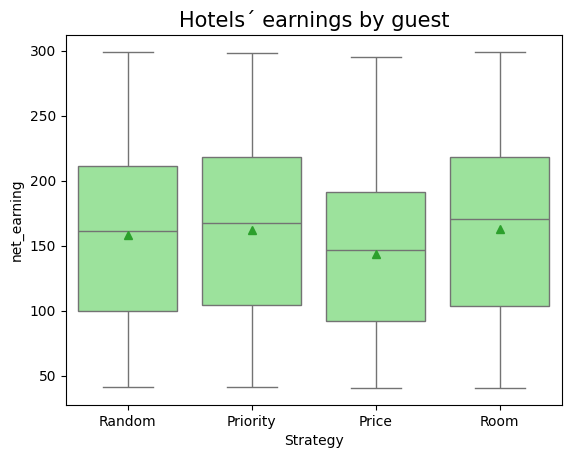

In [112]:
Random_strategy['Strategy'] = 'Random'
Priority_strategy['Strategy'] = 'Priority'
Price_strategy['Strategy'] = 'Price'
Room_strategy['Strategy'] = 'Room'

combined_df = pd.concat([Random_strategy, Priority_strategy, Price_strategy, Room_strategy])

fig = ax = plt.figure()
ax = sns.boxplot(data = combined_df, x='Strategy',y = 'net_earning', color='lightgreen', showmeans=True)
ax.set_title('Hotels´ earnings by guest', fontsize=15)